In [545]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
from sympy.utilities.lambdify import lambdify
from prettytable import PrettyTable

In [546]:
#Equation and initialization
eqn_sbl=symbols('x')
exp=eqn_sbl**3-eqn_sbl-1
f=lambdify(eqn_sbl,exp,"numpy")
table=PrettyTable()
table.field_names=["n","a","b","f(a)","f(b)","x","f(x)","Sign of f(x)"]
n,a,b,precision=1,-2,2,4

Text(0.5, 1.0, 'Initial Plot')

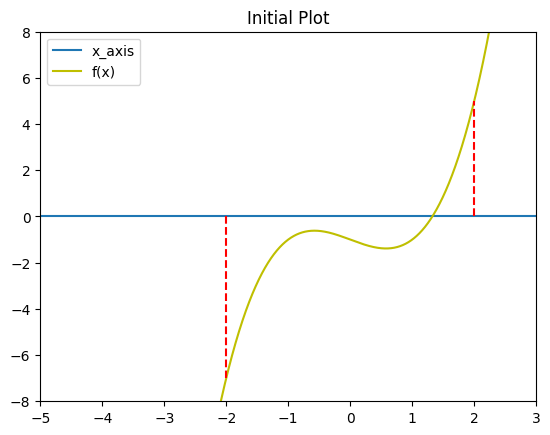

In [547]:
#initial graph 
x_values=np.arange(a-3,b+2,0.0001)
y_values=f(x_values)
plt.axis([-5,3,-8,8])
plt.axhline(y=0,xmax=4,xmin=-5,label="x_axis")
plt.plot(x_values,y_values,label="f(x)",color='y')
plt.vlines(a,0,f(a),color='r',linestyles='--')
plt.vlines(b,0,f(b),color='r',linestyles='--')
plt.legend()
plt.title("Initial Plot")

In [548]:
def x_calculator(a,b):
    x=(a*f(b)-b*f(a))/(f(b)-f(a))
    x=round(x,precision)
    return x

In [549]:
def addToTable(n,a,b,x):
    sign="+ve"
    if f(x)<0:sign="-ve"
    row=[n,a,b,round(f(a),precision),round(f(b),precision),x,round(f(x),precision),sign]
    table.add_row(row)

In [550]:
def falsePosition(a,b,n,prev_x):
    while(1):
        x=x_calculator(a,b)
        if (x==0): return x,n
        addToTable(n,a,b,x)
        if(f(x)<0):
            a=x
        else:
            b=x
        if(x==prev_x):
            return x,n
        prev_x=x
        n=n+1

In [551]:

root,iteration=falsePosition(a,b,n,0)
#display
print("\t\t\t\t\t\tCalculation Table\n")
print(table)
print("\n\n")
print(f"From False Position Method, the approximate root after {iteration} iterations = {root}\n\n")


						Calculation Table

+----+--------+---+---------+------+--------+---------+--------------+
| n  |   a    | b |   f(a)  | f(b) |   x    |   f(x)  | Sign of f(x) |
+----+--------+---+---------+------+--------+---------+--------------+
| 1  |   -2   | 2 |    -7   |  5   | 0.3333 | -1.2963 |     -ve      |
| 2  | 0.3333 | 2 | -1.2963 |  5   | 0.6764 | -1.3669 |     -ve      |
| 3  | 0.6764 | 2 | -1.3669 |  5   | 0.9606 | -1.0742 |     -ve      |
| 4  | 0.9606 | 2 | -1.0742 |  5   | 1.1444 | -0.6456 |     -ve      |
| 5  | 1.1444 | 2 | -0.6456 |  5   | 1.2422 | -0.3254 |     -ve      |
| 6  | 1.2422 | 2 | -0.3254 |  5   | 1.2885 | -0.1493 |     -ve      |
| 7  | 1.2885 | 2 | -0.1493 |  5   | 1.3091 | -0.0656 |     -ve      |
| 8  | 1.3091 | 2 | -0.0656 |  5   | 1.3181 |  -0.028 |     -ve      |
| 9  | 1.3181 | 2 |  -0.028 |  5   | 1.3219 |  -0.012 |     -ve      |
| 10 | 1.3219 | 2 |  -0.012 |  5   | 1.3235 | -0.0052 |     -ve      |
| 11 | 1.3235 | 2 | -0.0052 |  5   | 1.3242 | -0.002

Text(0.5, 1.0, 'Graph showing the calculated root')

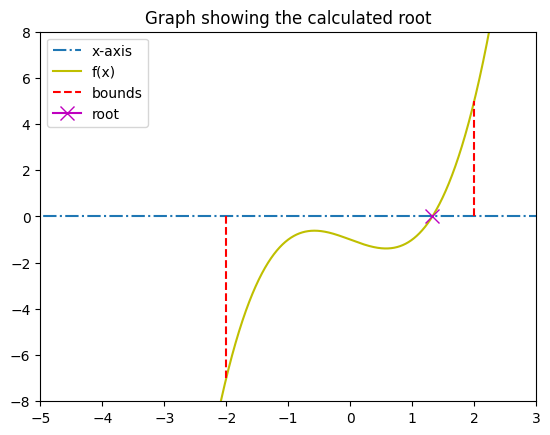

In [552]:
#root graph 
x_values=np.arange(a-3,b+2,0.0001)
y_values=f(x_values)
plt.axis([-5,3,-8,8])
#plt.axhline(y=0,xmax=4,xmin=-5,label="x_axis")
plt.hlines(0,-20,20,label="x-axis",linestyles="-.")
plt.plot(x_values,y_values,label="f(x)",color='y')
plt.vlines(a,0,f(a),color='r',linestyles='--',label="bounds")
plt.vlines(b,0,f(b),color='r',linestyles='--')
plt.plot(root,0,label="root",marker="x",color='m',markersize=10)
plt.legend()
plt.title("Graph showing the calculated root")
